<a href="https://colab.research.google.com/github/Leslie-T-art/PROJECT-DEPLOYMENT-/blob/main/disease%20prediction%20model%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction Title : Disease Prediction

Group Members: Natasha Ganyaupfu - R195864N Nicole Mphambela- R195865A Leslie Chihwai - R195793A

QUESTION 4:Create an Expert Clinical Decision Support System to Predict Diseases Using Classification Techniques

In [ ]:
print("hello")

hello


In [ ]:
#Mounting drive
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Importing libraries

In [ ]:
#importing libraries
import pandas as pd 
import numpy as np
from numpy import array
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
import missingno as ms
from sklearn.preprocessing import StandardScaler
from tkinter import *
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import pickle

Mounting drive

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/datasets/dataset.csv')
#printing the dataset
dataset

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#creating dataset
P_dataset = pd.DataFrame({'Disease':['Covid','Cancer','Ebola','lassa fever', 'Sars', 'Zika'],
                      'Symptom_1':['headaches',np.nan,'headaches','headaches',np.nan,np.nan],
                      'Symptom_2':['vomiting','vomiting','vomiting','vomiting','vomiting',np.nan],
                      'Symptom_3':['shortness of breath','shortness of breath',np.nan,'shortness of breath',np.nan,'shortness of breath'],
                      'Symptom_4':['fatigure','fatigure','fatigure','fatigure','fatigure','fatigure'],
                      'Symptom_5':['sore throat','sore throat','sore throat','sore throat','sore throat','sore throat'],
                      'Symptom_6':['nausea','nausea','nausea','nausea','nausea',np.nan],
                      'Symptom_7':['chest pains','chest pains','chest pains','chest pains','chest pains',np.nan],
                      'Symptom_8':['muscel pain',np.nan,'muscel pain','muscel pain','muscel pain','muscel pain'],
                      'Symptom_9':[np.nan,'itching','itching','itching','itching','itching'],
                      'Symptom_10':['sore throat','sore throat','sore throat','sore throat','sore throat','sore throat'],
                      'Symptom_11':['stomach pain',np.nan,'stomach pain','stomach pain','stomach pain','stomach pain'],
                      'Symptom_12':['chills','chills',np.nan,'chills','chills','chills'],
                      'Symptom_13':['loss of weight','loss of weight','loss of weight','loss of weight','loss of weight','loss of weight'],
                      'Symptom_14':[np.nan,'hair loss','hair loss','hair loss','hair loss','hair loss'],
                      'Symptom_15':['appetite loss','appetite loss','appetite loss','appetite loss','appetite loss','appetite loss'],
                      'Symptom_16':['high temperature','high temperature','high temperature','high temperature','high temperature','high temperature'],
                      'Symptom_17':[np.nan,'coldness','coldness','coldness','coldness','coldness'],
                      })
P_dataset

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Covid,headaches,vomiting,shortness of breath,fatigure,sore throat,nausea,chest pains,muscel pain,NaN,sore throat,stomach pain,chills,loss of weight,NaN,appetite loss,high temperature,NaN
1,Cancer,NaN,vomiting,shortness of breath,fatigure,sore throat,nausea,chest pains,NaN,itching,sore throat,NaN,chills,loss of weight,hair loss,appetite loss,high temperature,coldness
2,Ebola,headaches,vomiting,NaN,fatigure,sore throat,nausea,chest pains,muscel pain,itching,sore throat,stomach pain,NaN,loss of weight,hair loss,appetite loss,high temperature,coldness
3,lassa fever,headaches,vomiting,shortness of breath,fatigure,sore throat,nausea,chest pains,muscel pain,itching,sore throat,stomach pain,chills,loss of weight,hair loss,appetite loss,high temperature,coldness
4,Sars,NaN,vomiting,NaN,fatigure,sore throat,nausea,chest pains,muscel pain,itching,sore throat,stomach pain,chills,loss of weight,hair loss,appetite loss,high temperature,coldness
5,Zika,NaN,NaN,shortness of breath,fatigure,sore throat,NaN,NaN,muscel pain,itching,sore throat,stomach pain,chills,loss of weight,hair loss,appetite loss,high temperature,coldness


In [ ]:
dataset2 = pd.concat([dataset,P_dataset]) 
dataset2

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,Cancer,NaN,vomiting,shortness of breath,fatigure,sore throat,nausea,chest pains,NaN,itching,sore throat,NaN,chills,loss of weight,hair loss,appetite loss,high temperature,coldness
2,Ebola,headaches,vomiting,NaN,fatigure,sore throat,nausea,chest pains,muscel pain,itching,sore throat,stomach pain,NaN,loss of weight,hair loss,appetite loss,high temperature,coldness
3,lassa fever,headaches,vomiting,shortness of breath,fatigure,sore throat,nausea,chest pains,muscel pain,itching,sore throat,stomach pain,chills,loss of weight,hair loss,appetite loss,high temperature,coldness
4,Sars,NaN,vomiting,NaN,fatigure,sore throat,nausea,chest pains,muscel pain,itching,sore throat,stomach pain,chills,loss of weight,hair loss,appetite loss,high temperature,coldness


In [ ]:
#checking dataset shape
dataset2.shape

(4926, 18)

In [ ]:
#checking datatypes
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4926 entries, 0 to 5
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4926 non-null   object
 1   Symptom_1   4923 non-null   object
 2   Symptom_2   4925 non-null   object
 3   Symptom_3   4924 non-null   object
 4   Symptom_4   4578 non-null   object
 5   Symptom_5   3720 non-null   object
 6   Symptom_6   2939 non-null   object
 7   Symptom_7   2273 non-null   object
 8   Symptom_8   1949 non-null   object
 9   Symptom_9   1697 non-null   object
 10  Symptom_10  1518 non-null   object
 11  Symptom_11  1199 non-null   object
 12  Symptom_12  749 non-null    object
 13  Symptom_13  510 non-null    object
 14  Symptom_14  311 non-null    object
 15  Symptom_15  246 non-null    object
 16  Symptom_16  198 non-null    object
 17  Symptom_17  77 non-null     object
dtypes: object(18)
memory usage: 731.2+ KB


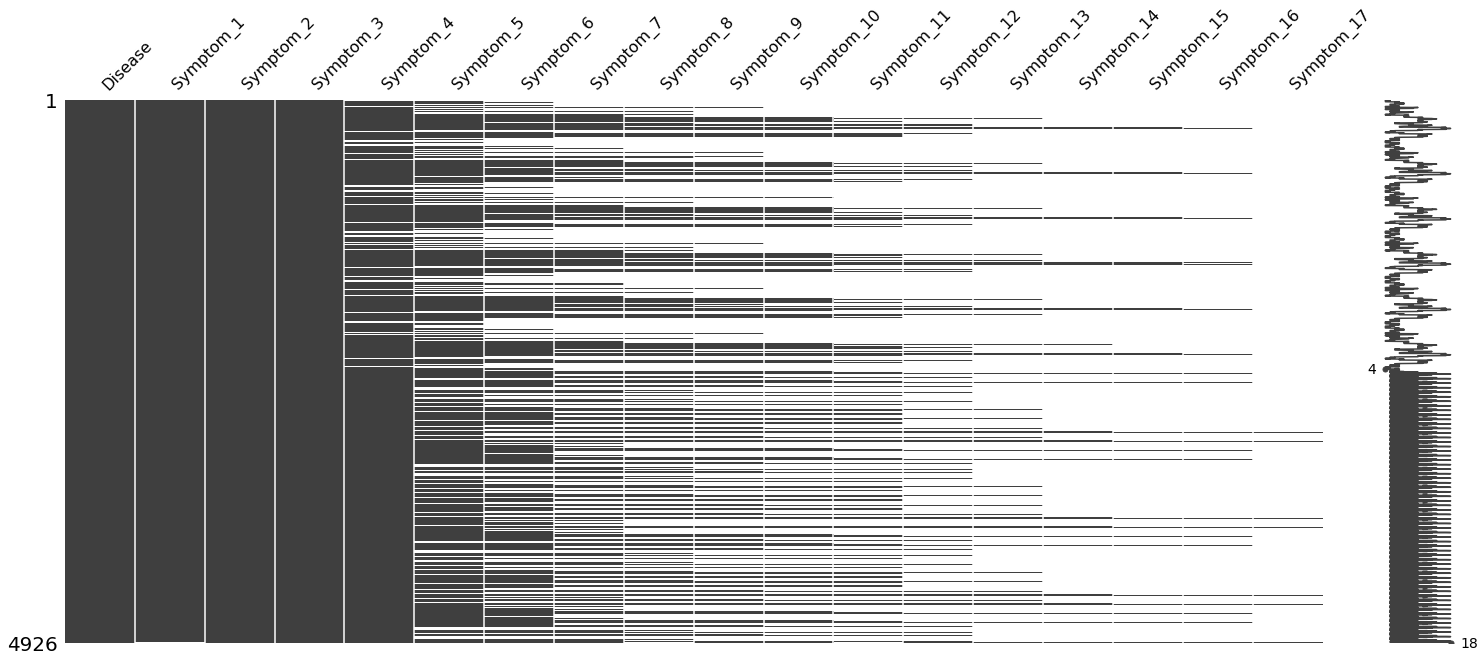

In [ ]:
#checking the health of the data to check if there are blank spaces
ms.matrix(dataset2)

In [ ]:
dataset2.dropna(how='all')

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,Cancer,NaN,vomiting,shortness of breath,fatigure,sore throat,nausea,chest pains,NaN,itching,sore throat,NaN,chills,loss of weight,hair loss,appetite loss,high temperature,coldness
2,Ebola,headaches,vomiting,NaN,fatigure,sore throat,nausea,chest pains,muscel pain,itching,sore throat,stomach pain,NaN,loss of weight,hair loss,appetite loss,high temperature,coldness
3,lassa fever,headaches,vomiting,shortness of breath,fatigure,sore throat,nausea,chest pains,muscel pain,itching,sore throat,stomach pain,chills,loss of weight,hair loss,appetite loss,high temperature,coldness
4,Sars,NaN,vomiting,NaN,fatigure,sore throat,nausea,chest pains,muscel pain,itching,sore throat,stomach pain,chills,loss of weight,hair loss,appetite loss,high temperature,coldness


In [ ]:
dataset3 =  dataset2.fillna(value='Blank')
dataset3.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank
3,Fungal infection,itching,skin_rash,dischromic _patches,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank


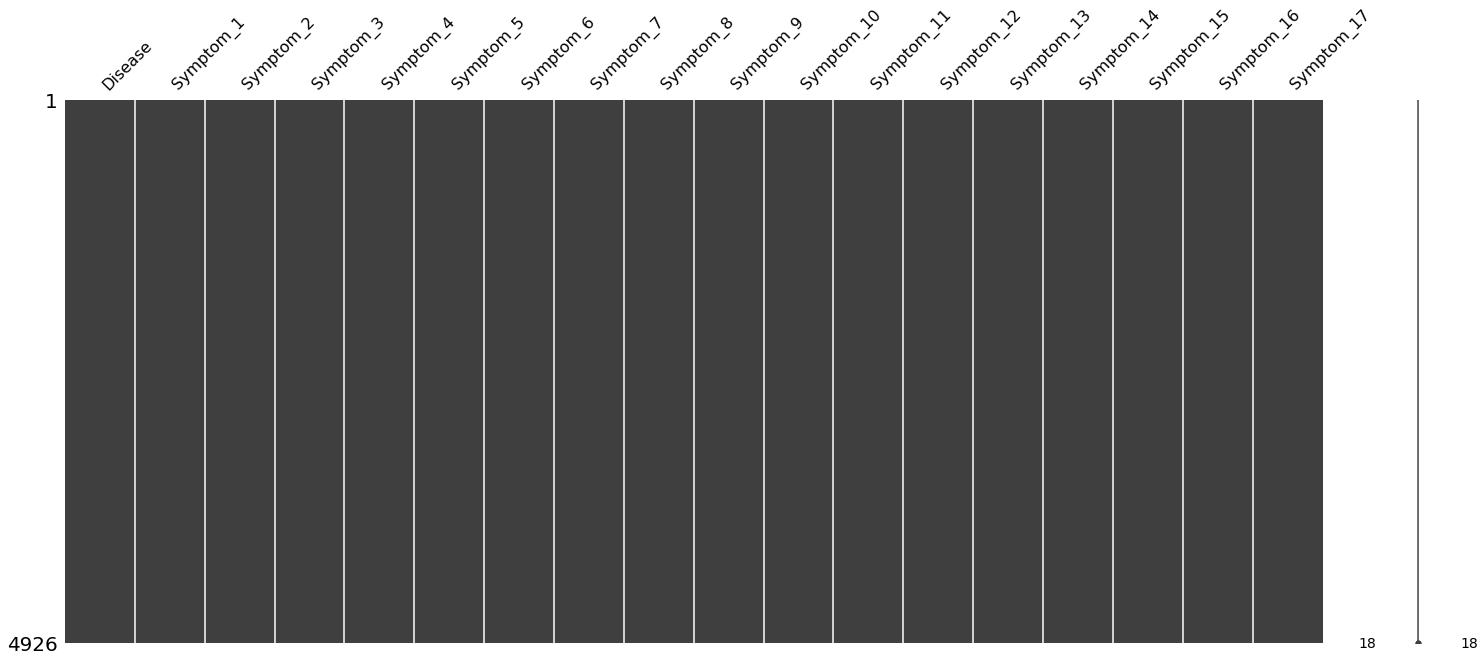

In [ ]:
#checking the health of the data to check if there are blank spaces
ms.matrix(dataset3)

In [ ]:
dataset3.isnull()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


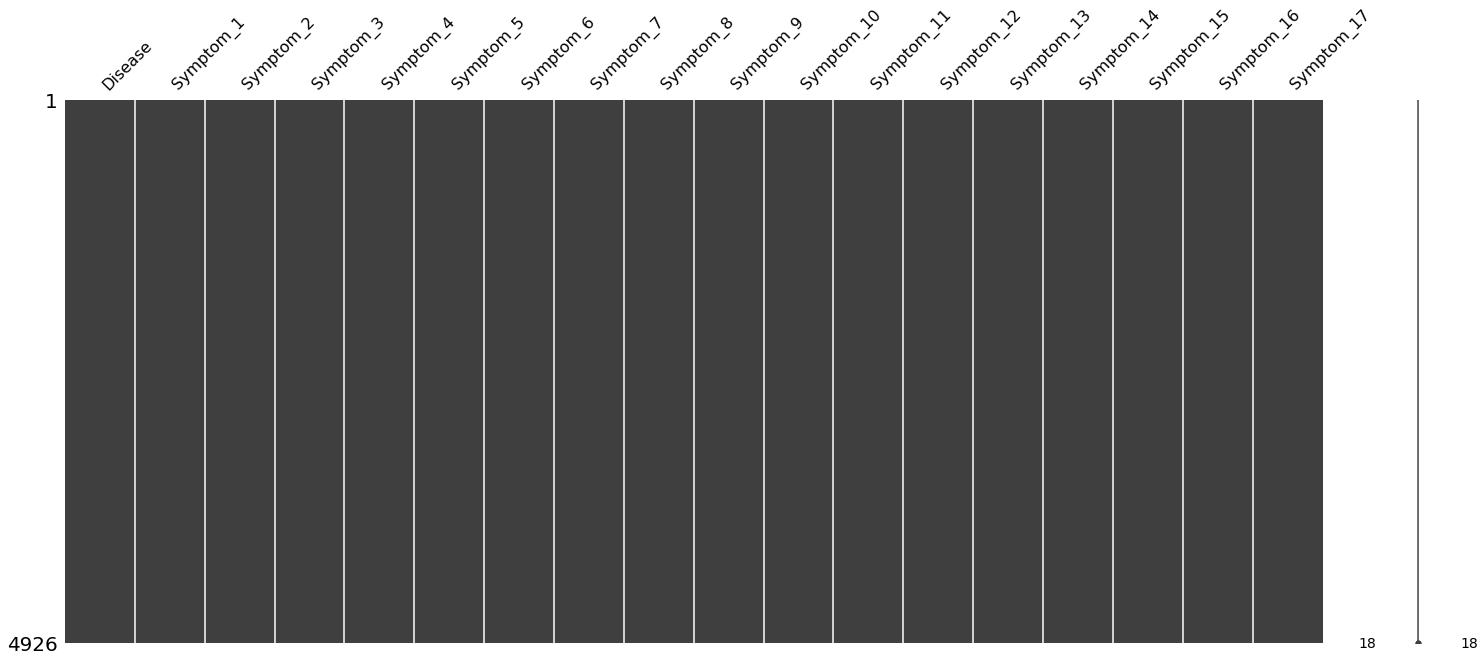

In [ ]:
ms.matrix(dataset3)

In [ ]:
#checking unique values in Disease column
dataset3['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo', 'Covid',
       'Cancer', 'Ebola', 'lassa fever', 'Sars', 'Zika'], dtype=object)

In [ ]:
#checking the actual number of unique value 
dataset3['Disease'].nunique()

47

In [ ]:
dataset3.replace({'Disease':{
 'Fungal infection':100,
 'Allergy':101,
 'GERD':102,
 'Chronic cholestasis':103,
 'Drug Reaction':104,
 'Peptic ulcer diseae':105,
 'AIDS':106,
 'Diabetes':107,
 'Gastroenteritis':108,
 'Bronchial Asthma':109,
 'Hypertension ':110,
 'Migraine':111,
 'Cervical spondylosis':112,
 'Paralysis (brain hemorrhage)':113,
 'Jaundice':114,
 'Malaria':115,
 'Chicken pox':116,
 'Dengue':117,
 'Typhoid':118,
 'hepatitis A':119,
 'Hepatitis B':120,
 'Hepatitis C':121,
 'Hepatitis D':122,
 'Hepatitis E':123,
 'Alcoholic hepatitis':124,
 'Tuberculosis':125,
 'Common Cold':127,
 'Pneumonia':128,
 'Dimorphic hemmorhoids(piles)':129,
 'Heart attack':130,
 'Varicose veins':131,
 'Hypothyroidism':132,
 'Hyperthyroidism':133,
 'Hypoglycemia':134,
 'Osteoarthristis':135,
 'Arthritis':136,
 '(vertigo) Paroymsal  Positional Vertigo':137,
 'Acne':137,
 'Urinary tract infection':138,
 'Psoriasis':139,
 'Impetigo':140,'Covid':141,
       'Cancer':142, 'Ebola':143, 'lassa fever':144, 'Sars':145, 'Zika':146,}},inplace=True) 
dataset3.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,100,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank
1,100,skin_rash,nodal_skin_eruptions,dischromic _patches,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank
2,100,itching,nodal_skin_eruptions,dischromic _patches,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank
3,100,itching,skin_rash,dischromic _patches,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank
4,100,itching,skin_rash,nodal_skin_eruptions,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank,Blank


In [ ]:
dataset3['Symptom_1'].unique()

array(['itching', ' skin_rash', ' continuous_sneezing', ' shivering',
       ' stomach_pain', ' acidity', ' vomiting', ' indigestion',
       ' muscle_wasting', ' patches_in_throat', ' fatigue',
       ' weight_loss', ' sunken_eyes', ' cough', ' headache',
       ' chest_pain', ' back_pain', ' weakness_in_limbs', ' chills',
       ' joint_pain', ' yellowish_skin', ' constipation',
       ' pain_during_bowel_movements', ' breathlessness', ' cramps',
       ' weight_gain', ' mood_swings', ' neck_pain', ' muscle_weakness',
       ' stiff_neck', ' pus_filled_pimples', ' burning_micturition',
       ' bladder_discomfort', ' high_fever', 'headaches', 'Blank'],
      dtype=object)

In [ ]:
dataset3['Symptom_1'].nunique()

36

In [ ]:
dataset3['Symptom_2'].unique()

array([' skin_rash', ' nodal_skin_eruptions', ' shivering', ' chills',
       ' acidity', ' ulcers_on_tongue', ' vomiting', ' yellowish_skin',
       ' stomach_pain', ' loss_of_appetite', ' indigestion',
       ' patches_in_throat', ' high_fever', ' weight_loss',
       ' restlessness', ' sunken_eyes', ' dehydration', ' cough',
       ' chest_pain', ' dizziness', ' headache', ' weakness_in_limbs',
       ' neck_pain', ' weakness_of_one_body_side', ' fatigue',
       ' joint_pain', ' lethargy', ' nausea', ' abdominal_pain',
       ' pain_during_bowel_movements', ' pain_in_anal_region',
       ' breathlessness', ' sweating', ' cramps', ' bruising',
       ' weight_gain', ' cold_hands_and_feets', ' mood_swings',
       ' anxiety', ' knee_pain', ' stiff_neck', ' swelling_joints',
       ' pus_filled_pimples', ' blackheads', ' bladder_discomfort',
       ' foul_smell_of urine', ' skin_peeling', ' blister', 'vomiting',
       'Blank'], dtype=object)

In [ ]:
dataset3['Symptom_2'].nunique()

50

In [ ]:
#symptoms are too different from cilumn to column hence need another encoding method.
#Encoding symptoms columns 
dataset3['Symptom_1'],_=pd.factorize(dataset2['Symptom_1'])
dataset3['Symptom_2'],_=pd.factorize(dataset2['Symptom_2'])
dataset3['Symptom_3'],_=pd.factorize(dataset2['Symptom_3'])
dataset3['Symptom_4'],_=pd.factorize(dataset2['Symptom_4'])
dataset3['Symptom_5'],_=pd.factorize(dataset2['Symptom_5'])
dataset3['Symptom_6'],_=pd.factorize(dataset2['Symptom_6'])
dataset3['Symptom_7'],_=pd.factorize(dataset2['Symptom_7'])
dataset3['Symptom_8'],_=pd.factorize(dataset2['Symptom_8'])
dataset3['Symptom_9'],_=pd.factorize(dataset2['Symptom_9'])
dataset3['Symptom_10'],_=pd.factorize(dataset2['Symptom_10'])
dataset3['Symptom_11'],_=pd.factorize(dataset2['Symptom_11'])
dataset3['Symptom_12'],_=pd.factorize(dataset2['Symptom_12'])
dataset3['Symptom_13'],_=pd.factorize(dataset2['Symptom_13'])
dataset3['Symptom_14'],_=pd.factorize(dataset2['Symptom_14'])
dataset3['Symptom_15'],_=pd.factorize(dataset2['Symptom_15'])
dataset3['Symptom_16'],_=pd.factorize(dataset2['Symptom_16'])
dataset3['Symptom_17'],_=pd.factorize(dataset2['Symptom_17'])
 
dataset3

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,100,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,100,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,100,0,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,100,0,0,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,100,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,142,-1,48,54,50,38,32,26,-1,22,21,-1,11,8,4,3,3,1
2,143,34,48,-1,50,38,32,26,21,22,21,18,-1,8,4,3,3,1
3,144,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
4,145,-1,48,-1,50,38,32,26,21,22,21,18,11,8,4,3,3,1


In [ ]:
#checking datatypes
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4926 entries, 0 to 5
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4926 non-null   object
 1   Symptom_1   4926 non-null   int64 
 2   Symptom_2   4926 non-null   int64 
 3   Symptom_3   4926 non-null   int64 
 4   Symptom_4   4926 non-null   int64 
 5   Symptom_5   4926 non-null   int64 
 6   Symptom_6   4926 non-null   int64 
 7   Symptom_7   4926 non-null   int64 
 8   Symptom_8   4926 non-null   int64 
 9   Symptom_9   4926 non-null   int64 
 10  Symptom_10  4926 non-null   int64 
 11  Symptom_11  4926 non-null   int64 
 12  Symptom_12  4926 non-null   int64 
 13  Symptom_13  4926 non-null   int64 
 14  Symptom_14  4926 non-null   int64 
 15  Symptom_15  4926 non-null   int64 
 16  Symptom_16  4926 non-null   int64 
 17  Symptom_17  4926 non-null   int64 
dtypes: int64(17), object(1)
memory usage: 731.2+ KB


In [ ]:
#converting disease to numeric
dataset3['Disease'] = pd.to_numeric(dataset3['Disease'], errors = 'coerce')
dataset3.loc[dataset['Disease'].isna()==True]
dataset3

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,100.0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,100.0,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,100.0,0,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,100.0,0,0,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,100.0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,142.0,-1,48,54,50,38,32,26,-1,22,21,-1,11,8,4,3,3,1
2,143.0,34,48,-1,50,38,32,26,21,22,21,18,-1,8,4,3,3,1
3,144.0,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
4,145.0,-1,48,-1,50,38,32,26,21,22,21,18,11,8,4,3,3,1


In [ ]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4926 entries, 0 to 5
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Disease     4806 non-null   float64
 1   Symptom_1   4926 non-null   int64  
 2   Symptom_2   4926 non-null   int64  
 3   Symptom_3   4926 non-null   int64  
 4   Symptom_4   4926 non-null   int64  
 5   Symptom_5   4926 non-null   int64  
 6   Symptom_6   4926 non-null   int64  
 7   Symptom_7   4926 non-null   int64  
 8   Symptom_8   4926 non-null   int64  
 9   Symptom_9   4926 non-null   int64  
 10  Symptom_10  4926 non-null   int64  
 11  Symptom_11  4926 non-null   int64  
 12  Symptom_12  4926 non-null   int64  
 13  Symptom_13  4926 non-null   int64  
 14  Symptom_14  4926 non-null   int64  
 15  Symptom_15  4926 non-null   int64  
 16  Symptom_16  4926 non-null   int64  
 17  Symptom_17  4926 non-null   int64  
dtypes: float64(1), int64(17)
memory usage: 731.2 KB


In [ ]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4926 entries, 0 to 5
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Disease     4806 non-null   float64
 1   Symptom_1   4926 non-null   int64  
 2   Symptom_2   4926 non-null   int64  
 3   Symptom_3   4926 non-null   int64  
 4   Symptom_4   4926 non-null   int64  
 5   Symptom_5   4926 non-null   int64  
 6   Symptom_6   4926 non-null   int64  
 7   Symptom_7   4926 non-null   int64  
 8   Symptom_8   4926 non-null   int64  
 9   Symptom_9   4926 non-null   int64  
 10  Symptom_10  4926 non-null   int64  
 11  Symptom_11  4926 non-null   int64  
 12  Symptom_12  4926 non-null   int64  
 13  Symptom_13  4926 non-null   int64  
 14  Symptom_14  4926 non-null   int64  
 15  Symptom_15  4926 non-null   int64  
 16  Symptom_16  4926 non-null   int64  
 17  Symptom_17  4926 non-null   int64  
dtypes: float64(1), int64(17)
memory usage: 731.2 KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


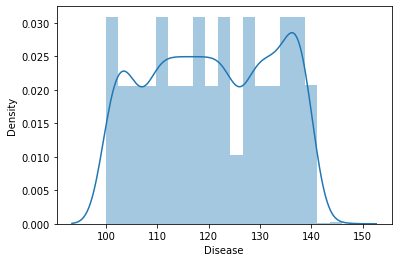

In [ ]:
# distribution for tenure.
sns.distplot(dataset3['Disease']);

In [ ]:
#relation using correlation matrix
dataset3.corr().style.background_gradient(cmap='PRGn_r')

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
Disease,1.000000,0.345542,0.681157,0.792583,0.740661,0.560806,0.404122,0.263201,0.197811,0.299366,0.320673,0.300542,0.232843,0.159872,0.107196,0.110354,0.110135,0.086932
Symptom_1,0.345542,1.000000,0.375199,0.293875,0.297514,0.167596,0.040861,0.063462,0.080619,0.097189,0.099754,0.050772,-0.013685,-0.004074,-0.048023,0.002020,-0.068487,-0.093833
Symptom_2,0.681157,0.375199,1.000000,0.650013,0.557083,0.196952,0.034351,0.003407,-0.041950,0.092837,0.139374,0.138325,0.042282,-0.063161,-0.182983,-0.116913,-0.129841,-0.090496
Symptom_3,0.792583,0.293875,0.650013,1.000000,0.587215,0.412435,0.158776,0.158323,0.076086,0.164126,0.176953,0.197262,0.206993,0.132552,0.059180,0.058171,0.053812,0.029119
Symptom_4,0.740661,0.297514,0.557083,0.587215,1.000000,0.545358,0.325768,0.110898,0.031277,0.100615,0.100167,0.094982,0.013945,-0.033070,-0.158642,-0.083251,-0.098166,-0.102862
Symptom_5,0.560806,0.167596,0.196952,0.412435,0.545358,1.000000,0.610829,0.358644,0.291737,0.337253,0.294990,0.243531,0.171585,0.105048,-0.009091,-0.003738,0.016940,0.050292
Symptom_6,0.404122,0.040861,0.034351,0.158776,0.325768,0.610829,1.000000,0.554069,0.492860,0.443376,0.430971,0.365909,0.332201,0.310321,0.194931,0.199028,0.162323,0.082114
Symptom_7,0.263201,0.063462,0.003407,0.158323,0.110898,0.358644,0.554069,1.000000,0.637182,0.770678,0.778432,0.750781,0.632189,0.490762,0.370530,0.334391,0.316045,0.209904
Symptom_8,0.197811,0.080619,-0.041950,0.076086,0.031277,0.291737,0.492860,0.637182,1.000000,0.754668,0.745853,0.643427,0.514640,0.545421,0.404444,0.360081,0.371553,0.242479
Symptom_9,0.299366,0.097189,0.092837,0.164126,0.100615,0.337253,0.443376,0.770678,0.754668,1.000000,0.943313,0.846321,0.630610,0.416438,0.280048,0.258077,0.259045,0.204991


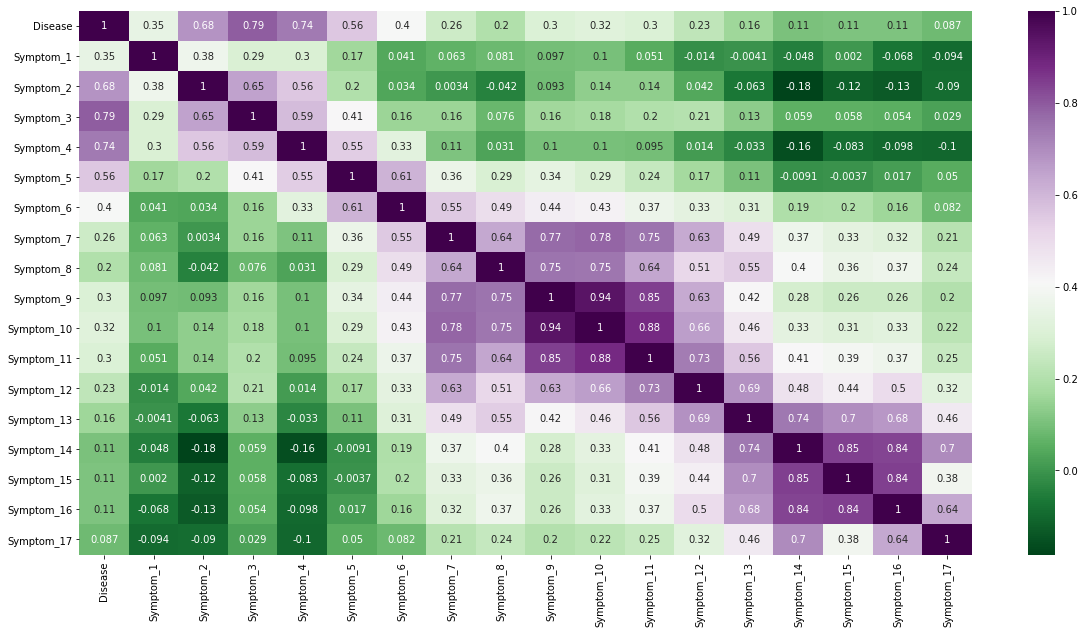

In [ ]:
#plotting a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(dataset3.corr(),annot=True,cmap='PRGn_r')

In [ ]:
#showing symptoms that are most frquent to the diseases
corr_matrix = dataset3.corr()   
corr_matrix 
 
corr_matrix['Disease'].sort_values(ascending=False)

Disease       1.000000
Symptom_3     0.792583
Symptom_4     0.740661
Symptom_2     0.681157
Symptom_5     0.560806
Symptom_6     0.404122
Symptom_1     0.345542
Symptom_10    0.320673
Symptom_11    0.300542
Symptom_9     0.299366
Symptom_7     0.263201
Symptom_12    0.232843
Symptom_8     0.197811
Symptom_13    0.159872
Symptom_15    0.110354
Symptom_16    0.110135
Symptom_14    0.107196
Symptom_17    0.086932
Name: Disease, dtype: float64

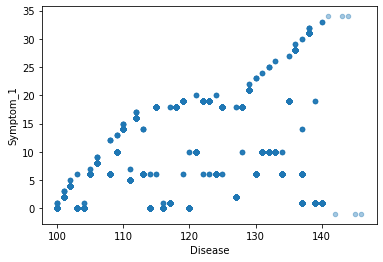

In [ ]:
#Visualising the effects of Symptom1 one to diseases
dataset3.plot(kind='scatter',x='Disease',y='Symptom_1',alpha=0.4)

In [ ]:
#Normalising/standardising data 
scaler = StandardScaler()
scaler.fit(dataset3.drop('Disease',axis=1))
sc_transform = scaler.transform(dataset3.drop('Disease',axis=1))
sc_dataset3 = pd.DataFrame(sc_transform)
 
sc_dataset3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.165737,-1.307290,-1.659782,-1.442297,-1.207174,-0.916275,-0.726385,-0.635227,-0.604764,-0.544817,-0.481241,-0.363981,-0.300237,-0.237783,-0.201753,-0.186777,-0.122721
1,-1.045691,-1.229147,-1.588815,-1.511483,-1.207174,-0.916275,-0.726385,-0.635227,-0.604764,-0.544817,-0.481241,-0.363981,-0.300237,-0.237783,-0.201753,-0.186777,-0.122721
2,-1.165737,-1.229147,-1.588815,-1.511483,-1.207174,-0.916275,-0.726385,-0.635227,-0.604764,-0.544817,-0.481241,-0.363981,-0.300237,-0.237783,-0.201753,-0.186777,-0.122721
3,-1.165737,-1.307290,-1.588815,-1.511483,-1.207174,-0.916275,-0.726385,-0.635227,-0.604764,-0.544817,-0.481241,-0.363981,-0.300237,-0.237783,-0.201753,-0.186777,-0.122721
4,-1.165737,-1.307290,-1.659782,-1.511483,-1.207174,-0.916275,-0.726385,-0.635227,-0.604764,-0.544817,-0.481241,-0.363981,-0.300237,-0.237783,-0.201753,-0.186777,-0.122721


In [ ]:
#selecting independent values or columns
feature_cols = ['Disease']
X = dataset3.iloc[:,[2,3]].values
y = dataset3.iloc[:,4].values

In [ ]:
#Test/Split data 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [ ]:
#feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
#Fitting model into descision tree
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [ ]:
y_pred = classifier.predict(X_test)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

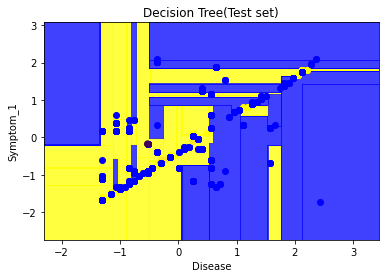

In [ ]:
#model prediction results
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop= X_set[:,0].max()+1, step = 0.01),np.arange(start = X_set[:,1].min()-1, stop= X_set[:,1].max()+1, step = 0.02))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap = ListedColormap(('yellow','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1], c = ListedColormap(('yellow','blue'))(i),label = j)
plt.title("Decision Tree(Test set)")
plt.xlabel("Disease")
plt.ylabel("Symptom_1")
plt.show()

In [ ]:
#checking how model performed
count_misclassified = (y_test).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 20756


In [ ]:
 
accuracy_score(y_test, y_pred)

0.8427991886409736

In [ ]:
accuracy_score(y_test, y_pred, normalize=False)

831

In [ ]:
#confusion matrix of data
cm = confusion_matrix(y_test, y_pred)
cm

array([[56,  3,  3, ...,  0,  0,  0],
       [ 0, 16,  0, ...,  0,  0,  0],
       [ 0,  0, 14, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 17,  0,  0],
       [ 0,  0,  0, ...,  0,  3,  0],
       [ 0,  0,  0, ...,  0,  0,  1]])

In [ ]:
#Recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='macro')

0.8708884338218437

In [ ]:
recall_score(y_test, y_pred, average='weighted')

0.8427991886409736

In [ ]:
recall_score(y_test, y_pred, average=None)

array([0.75675676, 1.        , 1.        , 1.        , 0.71428571,
       1.        , 1.        , 1.        , 0.77777778, 0.88888889,
       1.        , 1.        , 1.        , 0.5       , 1.        ,
       0.92      , 0.9       , 0.92307692, 1.        , 1.        ,
       0.5       , 1.        , 1.        , 0.        , 0.89552239,
       0.92857143, 0.4       , 0.83333333, 0.20512821, 0.42857143,
       0.85714286, 1.        , 0.66666667, 1.        , 0.85714286,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.66666667, 1.        ,
       1.        , 1.        , 1.        , 0.66666667, 1.        ,
       1.        , 1.        ])

In [ ]:
#precision
precision_score(y_test, y_pred, average='macro',zero_division='warn')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9094598397368585

In [ ]:
precision_score(y_test, y_pred, average='weighted',)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8532964125016472

In [ ]:
precision_score(y_test, y_pred, average=None)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([1.        , 0.84210526, 0.82352941, 0.85714286, 0.86206897,
       0.47169811, 0.95833333, 0.875     , 1.        , 1.        ,
       0.9375    , 0.71428571, 0.86666667, 1.        , 0.94736842,
       0.95833333, 1.        , 1.        , 1.        , 0.88235294,
       1.        , 0.92307692, 0.93333333, 0.        , 0.46875   ,
       0.94545455, 1.        , 1.        , 1.        , 0.72      ,
       1.        , 0.95238095, 1.        , 0.94736842, 1.        ,
       0.88461538, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.85714286, 1.        , 0.95238095,
       0.90909091, 0.88888889, 0.91304348, 1.        , 1.        ,
       1.        , 1.        ])

In [ ]:
#F1 score
f1_score(y_test, y_pred, average='weighted')

0.8240070511006561

In [ ]:
f1_score(y_test, y_pred, average='macro')

0.8709352225114526

In [ ]:
f1_score(y_test, y_pred, average=None)

array([0.86153846, 0.91428571, 0.90322581, 0.92307692, 0.78125   ,
       0.64102564, 0.9787234 , 0.93333333, 0.875     , 0.94117647,
       0.96774194, 0.83333333, 0.92857143, 0.66666667, 0.97297297,
       0.93877551, 0.94736842, 0.96      , 1.        , 0.9375    ,
       0.66666667, 0.96      , 0.96551724, 0.        , 0.61538462,
       0.93693694, 0.57142857, 0.90909091, 0.34042553, 0.53731343,
       0.92307692, 0.97560976, 0.8       , 0.97297297, 0.92307692,
       0.93877551, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.92307692, 0.8       , 0.97560976,
       0.95238095, 0.94117647, 0.95454545, 0.8       , 1.        ,
       1.        , 1.        ])

In [ ]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8427991886409736


In [ ]:
count_misclassified = (y_test).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 20756



CONCLUSION Accuracy remained nearly constant for all trials but the number of misclassified data dropped on the second training of data using decison tree from 20756 to 19800 and with random forest the accuaracy is nearly the same and so is the numbeer of misclassified data at 19800 again .The highest accuracy recorded is 0.843 at random forest as well as decision tree second train.

In [ ]:
pickle.dump(classifier, open('iri.pkl', 'wb'))

In [ ]:
with open('classifier', 'wb') as f:
  pickle.dump(classifier,f)